In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart = pd.read_csv('heartdiseaseprediction.csv')

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
#heart.drop(['education'],axis=1,inplace=True)

In [4]:
heart.rename(columns={'male':'Sex_male'},inplace=True)

In [5]:
heart.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#Filling NaN values for contionous variables by 'mean' method
heart[['age','education','BPMeds','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = heart[['age','education',
                                                                                                                      'BPMeds','cigsPerDay',
                                                                                                      'totChol','sysBP','diaBP','BMI',
                                                                                                      'heartRate',
                                                                                                      'glucose']].fillna((heart[['age','education',
                                                                                                                                    'BPMeds','cigsPerDay',
                                                                                                                                    'totChol',
                                                                                                                                    'sysBP','diaBP','BMI','heartRate',
                                                                                                                                    'glucose']].mean()))
                                                                                                      
                                                                                                                                                                              
#Filling NaN values for discrete variables by 'median' method                                                                                                      
heart[['Sex_male','currentSmoker','prevalentStroke','prevalentHyp','diabetes']] = heart[['Sex_male','currentSmoker',
                                                                                           'prevalentStroke','prevalentHyp',
                                                                                           'diabetes']].fillna((heart[['Sex_male','currentSmoker',
                                                                                                                          'prevalentStroke','prevalentHyp','diabetes']].median()))

                                                                                                                                                           
                                                                                                                                                                                  
heart

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [7]:
#Using SimpleImputer to fill in missing values
def impute_glucose(cols):
    dia=cols[0]
    glu=cols[1]

    #For missing glucose values
    if pd.isnull(glu):
        # If diabetes is 0 return 79
        if dia == 0:
            return 79
        # If diabetes is 1 return 170
        else:
            return 170
    else:
        return glu

heart['glucose'] = heart[['diabetes','glucose']].apply(impute_glucose,axis=1)

In [8]:
heart.dropna(axis=0,inplace=True)

In [9]:
heart.describe()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#sns.pairplot(heart)

In [11]:
heart.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [12]:
heart.currentSmoker.value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


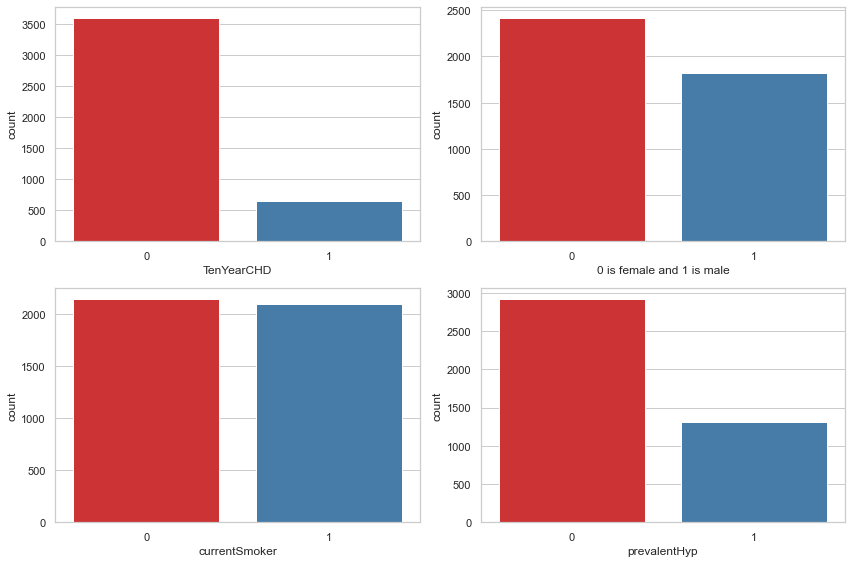

In [67]:
sns.set(style="whitegrid",palette='Set1')

#Distribution of boolean variables
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.countplot(heart.TenYearCHD,ax=axes[0,0])
sns.countplot(heart.Sex_male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(heart.currentSmoker,ax=axes[1,0])
#sns.countplot(heart.BPMeds,ax=axes[1,0])
#sns.countplot(heart.prevalentStroke,ax=axes[1,1])
sns.countplot(heart.prevalentHyp,ax=axes[1,1])

plt.tight_layout()

Distribution of continuous variables


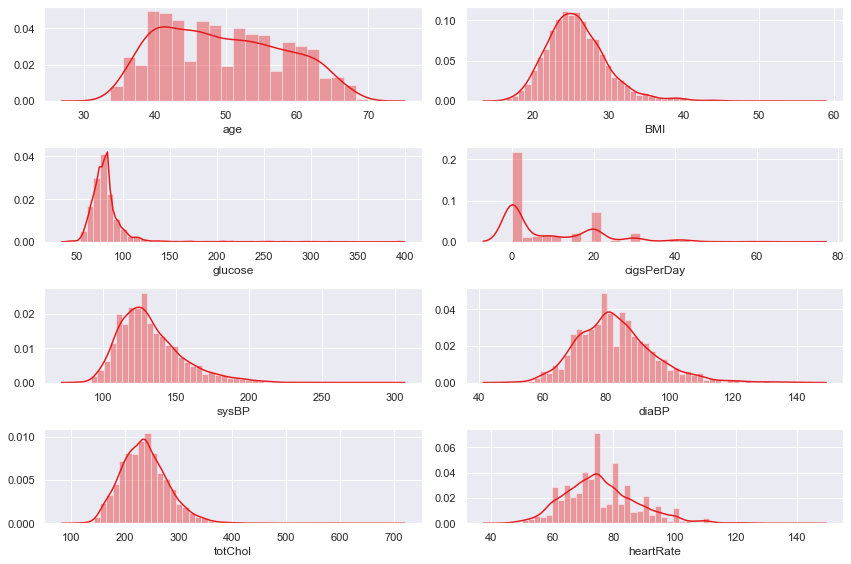

In [14]:
sns.set(style="darkgrid",palette='Set1')

#Distribution of continuous variables
print("Distribution of continuous variables")
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(12,8))

sns.distplot(heart.age,ax=axes[0,0])
sns.distplot(heart.BMI,ax=axes[0,1])
sns.distplot(heart.glucose,ax=axes[1,0])
sns.distplot(heart.cigsPerDay,ax=axes[1,1])
sns.distplot(heart.sysBP,ax=axes[2,0])
sns.distplot(heart.diaBP,ax=axes[2,1])
sns.distplot(heart.totChol,ax=axes[3,0])
sns.distplot(heart.heartRate,ax=axes[3,1])

plt.tight_layout()

Text(0.5, 1.0, 'Graph showing mean sysBP by age group.')

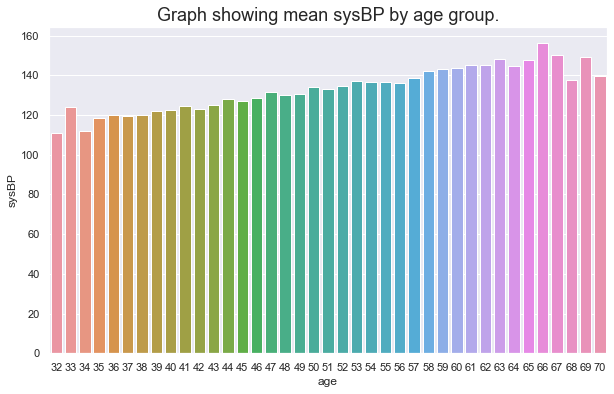

In [16]:
#graph = heart.groupby("age",as_index=False).currentSmoker.sum()
graph = heart.groupby("age",as_index=False).sysBP.mean()
plt.figure(figsize=(10,6))
sns.barplot(x=graph["age"], y=graph["sysBP"])

plt.title("Graph showing mean sysBP by age group.",{'fontsize':18})

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

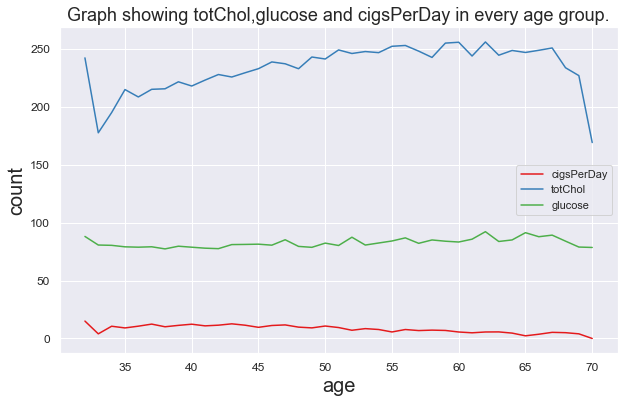

In [17]:
cig = heart.groupby("age").cigsPerDay.mean()
chol = heart.groupby("age").totChol.mean()
glucose = heart.groupby("age").glucose.mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=cig, label="cigsPerDay")
sns.lineplot(data=chol, label="totChol")
sns.lineplot(data=glucose, label="glucose")

plt.title("Graph showing totChol,glucose and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [18]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_heart = pd.DataFrame(scaler.fit_transform(heart[['Sex_male','education','age','cigsPerDay','prevalentHyp','totChol','diabetes','sysBP','diaBP','BPMeds',
                                                          'glucose','prevalentStroke','BMI','heartRate','currentSmoker']]))
scaled_heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.000000,0.184211,0.000000,0.0,0.149406,0.0,0.106383,0.232804,0.000000,0.104520,0.0,0.277024,0.363636,0.0
1,0.0,0.333333,0.368421,0.000000,0.0,0.242784,0.0,0.177305,0.349206,0.000000,0.101695,0.0,0.319680,0.515152,0.0
2,1.0,0.000000,0.421053,0.285714,0.0,0.234295,0.0,0.208038,0.338624,0.000000,0.084746,0.0,0.237518,0.313131,1.0
3,0.0,0.666667,0.763158,0.428571,1.0,0.200340,0.0,0.314421,0.497354,0.000000,0.177966,0.0,0.316045,0.212121,1.0
4,0.0,0.666667,0.368421,0.328571,0.0,0.302207,0.0,0.219858,0.380952,0.000000,0.127119,0.0,0.183228,0.414141,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.333333,0.421053,0.285714,0.0,0.239389,0.0,0.224586,0.253968,0.029615,0.129944,0.0,0.156568,0.404040,1.0
4236,0.0,0.000000,0.315789,0.214286,0.0,0.174873,0.0,0.203310,0.412698,0.000000,0.118541,0.0,0.087736,0.424242,1.0
4237,0.0,0.333333,0.526316,0.000000,0.0,0.275042,0.0,0.236407,0.370370,0.000000,0.189266,0.0,0.143723,0.363636,0.0
4238,1.0,0.666667,0.210526,0.000000,1.0,0.132428,0.0,0.271868,0.529101,0.000000,0.090395,0.0,0.243820,0.232323,0.0


In [19]:
scaled_heart = scaled_heart.rename(columns= {0:"Sex_male", 1:"age",2:"education",3:"currentSmoker", 4:"cigsPerDay", 5:"BPMeds",
                                          6:"prevalentStroke",7:"prevalentHyp", 8:"diabetes", 9:"totChol", 10:"sysBP", 11:"diaBP", 12:"BMI", 13:"heartRate",
                                          14:"glucose"})

#Converting data type of categorical variables to integer type
scaled_heart = scaled_heart.astype({"Sex_male":'int', "currentSmoker":'int', "BPMeds":'int',"diabetes":'int',"sysBP":'int',"glucose":'int'})

#Concatenate the dataframes for building the model
scale_heart = pd.concat([scaled_heart, heart['TenYearCHD']],axis =1)
scale_heart.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1.000000,0.184211,0,0.0,0,0.0,0.106383,0,0.0,0,0.0,0.277024,0.363636,0,0
1,0,0.333333,0.368421,0,0.0,0,0.0,0.177305,0,0.0,0,0.0,0.319680,0.515152,0,0
2,1,0.000000,0.421053,0,0.0,0,0.0,0.208038,0,0.0,0,0.0,0.237518,0.313131,1,0
3,0,0.666667,0.763158,0,1.0,0,0.0,0.314421,0,0.0,0,0.0,0.316045,0.212121,1,1
4,0,0.666667,0.368421,0,0.0,0,0.0,0.219858,0,0.0,0,0.0,0.183228,0.414141,1,0


In [20]:
#Finding p-value using Logit                                                                           
imputed_heart_model = sm.Logit(scale_heart['TenYearCHD'], scale_heart[['Sex_male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke',
                                                               'prevalentHyp','diabetes','totChol','sysBP',
                                                               'diaBP','BMI','heartRate','glucose']]).fit()
imputed_heart_model.summary()

         Current function value: 0.421735
         Iterations: 35


LinAlgError: Singular matrix

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = heart.iloc[:,0:15]  
y = heart.iloc[:,-1]    

#Using 'SelectKBest method to identify most important features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score')) 

              Specs       Score
10            sysBP  727.935535
14          glucose  391.151105
1               age  319.266019
9           totChol  235.502392
4        cigsPerDay  220.812679
11            diaBP  152.748563
7      prevalentHyp   92.048736
8          diabetes   39.144944
5            BPMeds   30.615014
0          Sex_male   18.899930
6   prevalentStroke   16.109887


In [22]:
#SOrting features by 'scores'
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.935535
14,glucose,391.151105
1,age,319.266019
9,totChol,235.502392
4,cigsPerDay,220.812679
11,diaBP,152.748563
7,prevalentHyp,92.048736
8,diabetes,39.144944
5,BPMeds,30.615014
0,Sex_male,18.899930


In [23]:
features_list = featureScores["Specs"].tolist()[:11]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'Sex_male',
 'prevalentStroke']

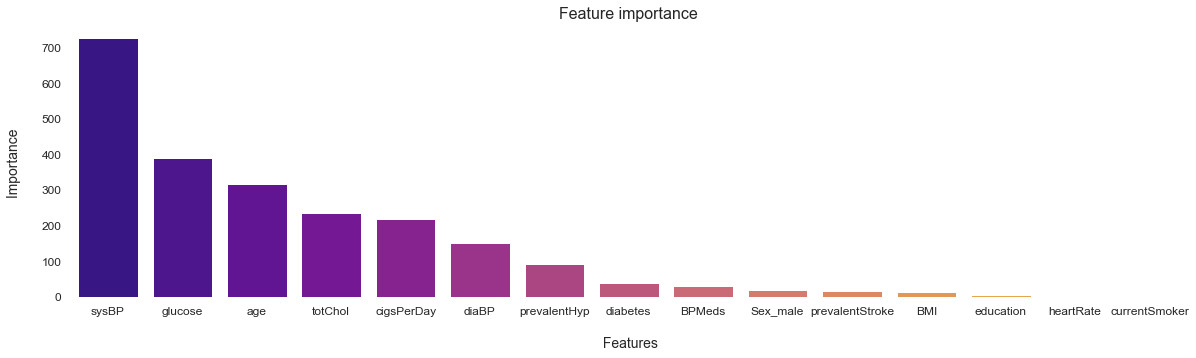

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "plasma")
plt.box(False)

plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [25]:
#Dataframe with selected features
df_heart = scale_heart[['Sex_male','age','cigsPerDay','prevalentHyp','prevalentStroke','totChol','diabetes','sysBP','diaBP','BPMeds','glucose','TenYearCHD']]
df_heart

,Sex_male,age,cigsPerDay,prevalentHyp,prevalentStroke,totChol,diabetes,sysBP,diaBP,BPMeds,glucose,TenYearCHD
0,1,1.000000,0.0,0.106383,0.0,0.000000,0,0,0.0,0,0,0
1,0,0.333333,0.0,0.177305,0.0,0.000000,0,0,0.0,0,0,0
2,1,0.000000,0.0,0.208038,0.0,0.000000,0,0,0.0,0,1,0
3,0,0.666667,1.0,0.314421,0.0,0.000000,0,0,0.0,0,1,1
4,0,0.666667,0.0,0.219858,0.0,0.000000,0,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,0.333333,0.0,0.224586,0.0,0.029615,0,0,0.0,0,1,0
4236,0,0.000000,0.0,0.203310,0.0,0.000000,0,0,0.0,0,1,0
4237,0,0.333333,0.0,0.236407,0.0,0.000000,0,0,0.0,0,0,0
4238,1,0.666667,1.0,0.271868,0.0,0.000000,0,0,0.0,0,0,0


Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


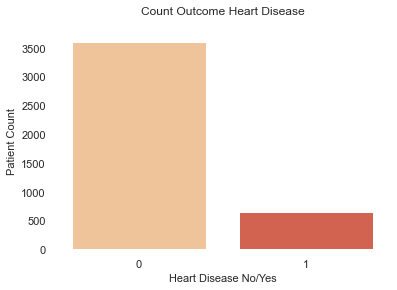

In [26]:
target_count = heart.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(heart.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

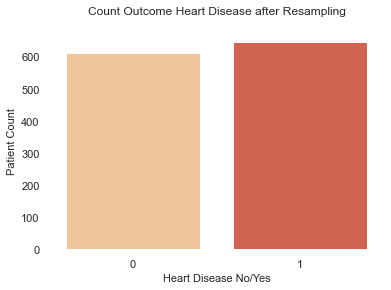

In [27]:
# Shuffle df
shuffled_df = heart.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=492)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

y = df_heart['TenYearCHD']
X = df_heart.drop(['TenYearCHD'], axis = 1)

#Divide the data into - train, test and split
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [29]:
#Using logistic regression with penalty l2 (default)
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_logreg = logreg.predict(X_val)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_val, normalized_logreg)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_val, normalized_logreg)
print(f"The f1 score for LogisticRegression is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_val, normalized_logreg)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_val, normalized_logreg)
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")

The accuracy score for LogisticRegression is: 85.3%
The f1 score for LogisticRegression is: 6.3%
The precision score for LogisticRegression is: 50.0%
The recall score for LogisticRegression is: 3.4000000000000004%


In [30]:
#Using logistic regression with penalty l1 and solver 'saga'
logreg = LogisticRegression(penalty= 'l1', solver = 'saga')

# fit model
logreg.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_logreg = logreg.predict(X_val)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_val, normalized_logreg)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_val, normalized_logreg)
print(f"The f1 score for LogisticRegression is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_val, normalized_logreg)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_val, normalized_logreg)
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")

The accuracy score for LogisticRegression is: 85.5%
The f1 score for LogisticRegression is: 8.3%
The precision score for LogisticRegression is: 57.099999999999994%
The recall score for LogisticRegression is: 4.5%


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6) 
X_poly = poly.fit_transform(X_train)

In [32]:
model = LogisticRegression()
model.fit(X_poly, y_train)

y_train_pred = model.predict(X_poly)

X_val_poly = poly.fit_transform(X_val)

y_val_pred = model.predict(X_val_poly)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score( y_val, y_val_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

The accuracy score for LogisticRegression is: 84.5%


### Decision Tree

In [33]:
#initialize model
dt = DecisionTreeClassifier()

# fit model
dt.fit(X_train, y_train)

normalized_dt = dt.predict(X_val)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_val, normalized_dt)
print(f"The accuracy score for DT is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_val, normalized_dt)
print(f"The f1 score for DT is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_val, normalized_dt)
print(f"The precision score for DT is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_val, normalized_dt)
print(f"The recall score for DT is: {round(recall,3)*100}%")

The accuracy score for DT is: 82.1%
The f1 score for DT is: 25.0%
The precision score for DT is: 32.7%
The recall score for DT is: 20.200000000000003%


In [64]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": list(range(1,9)),
              "min_samples_leaf": list(range(1,9)),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_val,y_val)

# Print the tuned parameters and score
print("Best Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("The accuracy for DTC is {}".format((tree_cv.best_score_)*100))

Best Decision Tree Parameters: {'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 3, 'criterion': 'gini'}
The accuracy for DTC is 85.61983471074382


In [63]:
dtc_acc = tree_cv.score(X_test, y_test)
print(f"The accuracy score for Decision tree classfier is: {round(dtc_acc,3)*100}%")

The accuracy score for Decision tree classfier is: 86.3%
